In [3]:
from ultralytics import YOLO
import cv2
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_video_path = Path.cwd().parent / "data" / "raw" / "video1" / "video_fps5.mp4"

model_path = (
    Path.cwd().parent / "runs" / "detect" / "dataset7_2" / "weights" / "best.pt"
)

In [3]:
model = YOLO(model_path)

In [4]:
cap = cv2.VideoCapture(raw_video_path)

In [5]:
batch_size = 32
counter = 0

success = True
frames = []
while success and counter < batch_size:
    success, frame = cap.read()
    frames.append(frame)
    counter += 1

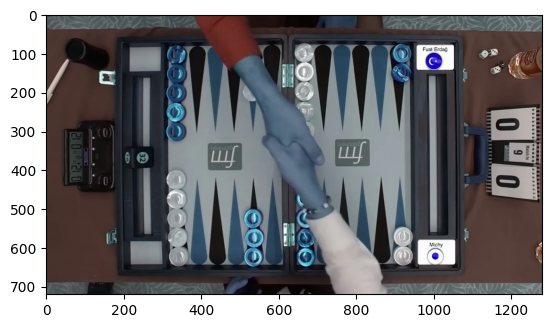

In [10]:
plt.imshow(frames[11])

In [ ]:
res = model.predict(frames, imgsz=1280, batch=True, verbose=False)

In [37]:
res[0].save_txt("predictions", save_conf=True)

'predictions'

In [16]:
states_path = Path.cwd().parent / "test-out-5-parsed-3"


states_df = (
    pd.DataFrame([json.load(x.open()) for x in states_path.glob("*.json")])
    .sort_values(by="file_index")
    .reset_index(drop=True)
)
print(f"Total number of parsed frames:\t{states_df.shape[0]}")
print(
    f"Total number of valid frames:\t{states_df[states_df.status == "VALID"].shape[0]}"
)
valid_df = states_df[states_df.status == "VALID"]
states_df.head()

Total number of parsed frames:	13968
Total number of valid frames:	7668


,status,file_index,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,...,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,board_1_dice,board_2_dice
0,VALID,1,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,VALID,2,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,VALID,3,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,VALID,4,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,VALID,5,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


<Axes: xlabel='file_index'>

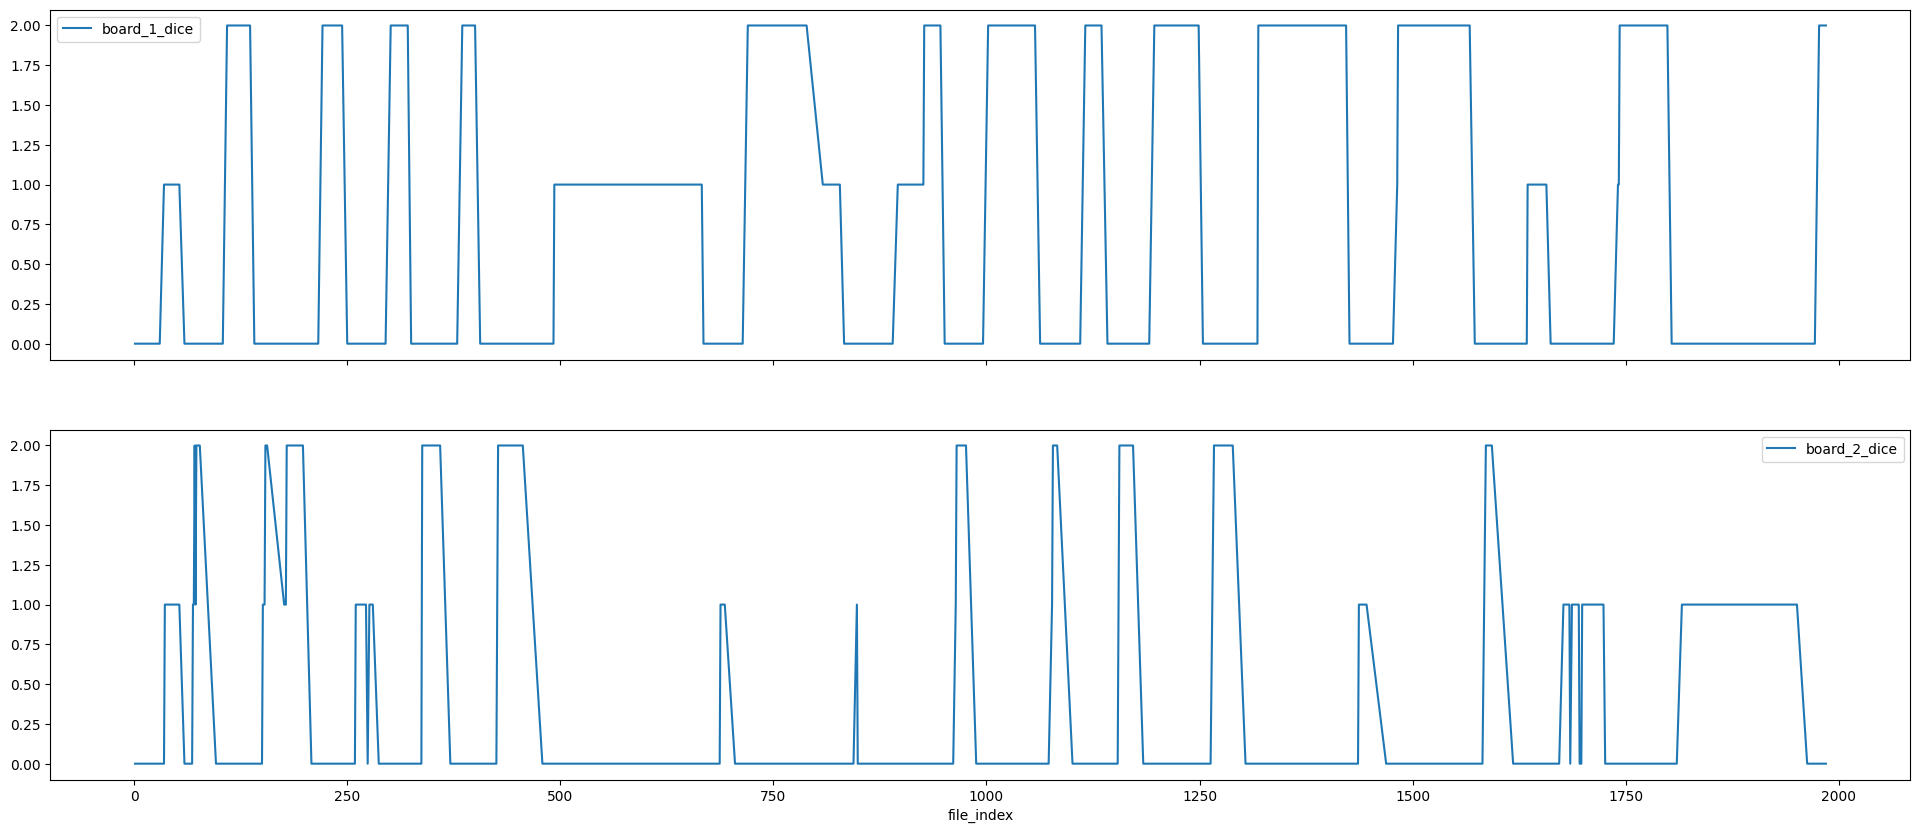

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(24, 10), sharex=True)

frame_cutoff = 2000

valid_df[valid_df.file_index < frame_cutoff].plot(
    ax=ax[0], x="file_index", y="board_1_dice"
)
valid_df[valid_df.file_index < frame_cutoff].plot(
    ax=ax[1], x="file_index", y="board_2_dice"
)